**Context**  
The motivation behind collecting this data-set is personal for Ravi. Ravi noticed for a while that during the months when he is  exercising regularly, he felt more active and would move around a lot more, as opposed to when he was not working out, he would feel lethargic. 
[Ravi wanted to know the connection between exercise, stepcount and activeness.]

**Objective**
1. To investigate whether exercise/ working-out will increase daily step-count
2. To examine the association between exercise/ working-out and person’s activeness 

**Data Dictionary**
date
step_count
mood
calories_burned
hours_of_sleep
bool_of_active
weight_kg

**Research question - 1**
Does exercise/ working-out increase daily step-count? 

**Hypothesis**
H0: There is no association between exercise and increase in daily step-count
H1: There is a significant association between exercise and increase in daily step-count

Dependent Feature/ Variable/ Attribute 
   - stepcount

Independent Features/ Variables/ Atributes
   - caloriesburnt
   - sleephrs 
   - weight
   - mood_Happy, mood_Neutral, mood_Sad
   - activeness_Active, activeness_In-active


**Research question - 2**
Does exercise/ working-out improve a person’s activeness? 

**Hypothesis**
H0: There is no association between exercise and improvement in person’s activeness
H1: There is a significant association between exercise and improvement in person’s activeness

Dependent Feature/ Variable/ Attribute 
   - activeness

Independent Features/ Variables/ Atributes
   - stepcount
   - caloriesburnt
   - sleephrs 
   - weight
   - mood

**Proposed study** 
- Objective 1 - Multiple Linear Regression
- Objective 2 - Naive bayes classifier

In [1]:
# 1. Import pre-requisite libraries & Load the dataset

import warnings 
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# Contd... load the dataset 

fitness = pd.read_csv(r'C:\Users\hp\Downloads\body_fitness_dataset.csv') 
print("Dimensions of dataset: ",fitness.shape)
print("Column names \n",fitness.columns)
fitness.info()

Dimensions of dataset:  (96, 7)
Column names 
 Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [3]:
# Contd... load the dataset with data type of date changed from object to datetime64[ns]

fitness = pd.read_csv(r'C:\Users\hp\Downloads\body_fitness_dataset.csv',parse_dates=['date']) 
print("Dimensions of dataset: ",fitness.shape)
print("Column names \n",fitness.columns)
fitness.info()
fitness.head()

Dimensions of dataset:  (96, 7)
Column names 
 Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             96 non-null     datetime64[ns]
 1   step_count       96 non-null     int64         
 2   mood             96 non-null     int64         
 3   calories_burned  96 non-null     int64         
 4   hours_of_sleep   96 non-null     int64         
 5   bool_of_active   96 non-null     int64         
 6   weight_kg        96 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.4 KB


,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [4]:
# Present data activeness-wise by grouping similar observations

fitness_regime = fitness.groupby(['bool_of_active']).sum()
fitness_regime

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
bool_of_active,,,,,
0,146334,9900,4670,272,3480
500,135516,10400,4301,229,2691


2. Organizing Data 
   2.1. Rename features names (step_count to stepcount, calories_burned to caloriesburnt, hours_of_sleep to sleephrs, bool_of_active                                to activeness, and weight_kg to weight)
   2.2. Frequency of values as percentage for Feature activeness
   2.3. Cross Tabulation - Activeness vs. Mood swings
   2.4. Data Visualization

In [5]:
# 2.1. Change features names (step_count to stepcount, calories_burned to caloriesburnt, hours_of_sleep to sleephrs, 
#                             bool_of_active to activeness, and weight_kg to weight)

fitness.rename({'step_count':'stepcount','calories_burned':'caloriesburnt','hours_of_sleep':'sleephrs',
                'bool_of_active':'activeness','weight_kg':'weight'},axis=1,inplace=True)
print("Modified column names for confirmed dataset  \n", fitness.columns)

Modified column names for confirmed dataset  
 Index(['date', 'stepcount', 'mood', 'caloriesburnt', 'sleephrs', 'activeness',
       'weight'],
      dtype='object')


In [6]:
# Access the first and last dates

print(fitness.date)
print("First observation",fitness.date[0])
print("Last observation",fitness.date[95])
print("Last observation using iloc()",fitness.date.iloc[-1])
#print("Last observation",fitness.date.loc[['09-01-2018']])

0    2017-10-06
1    2017-10-07
2    2017-10-08
3    2017-10-09
4    2017-10-10
        ...    
91   2018-01-05
92   2018-01-06
93   2018-01-07
94   2018-01-08
95   2018-01-09
Name: date, Length: 96, dtype: datetime64[ns]
First observation 2017-10-06 00:00:00
Last observation 2018-01-09 00:00:00
Last observation using iloc() 2018-01-09 00:00:00


In [7]:
# 2.2. Frequency & percentage of observations for Feature activeness 

print('Simple Frequency Table - Activeness status')
SFT = fitness['activeness'].value_counts(normalize =True)
print(SFT)

print("\nRelative Frequency Table - Activeness status\n",SFT * 100)

Simple Frequency Table - Activeness status
0      0.5625
500    0.4375
Name: activeness, dtype: float64

Relative Frequency Table - Activeness status
 0      56.25
500    43.75
Name: activeness, dtype: float64


**Interpretation*

- It is observed the probablity of Ravi being active (500) is 0.4375 against ravi's probability of being inactive as 0.5625. 
- 44% of the days Ravi is active and 56% of days Ravi is inactive as per the data analysis 

In [8]:
# 2.3. Cross Tabulation - Activeness vs. Mood swings

pd.crosstab(index=fitness['activeness'], columns=[fitness['mood']], margins=True)

mood,100,200,300,All
activeness,,,,
0,25,13,16,54
500,4,14,24,42
All,29,27,40,96


### 2.4. Data visualization models - using matplotlib and seaborn packages

**I. Uni-variate Plots**
   1.  countplot() - seaborn package

   2.  hist()      - matplotlib package - Histogram (Plot categorical data)
   
   3.  distplot()  - seaborn package (Plot continuous data - Displays the distribution of the data)
   4.  kdeplot()   - seaborn package - (Plot Numerical feature - Plots a histogram & fits a kernel density estimate - KDE)
   
**II. Bi-variate Plots**
   5.  jointplot() - seaborn package - Draw a plot of two variables with bivariate & univariate graphs
   6.  scatter()   - matplotlib package - Scatterplot - Checks the linearity of data. Permissible for both discrete & continuous data
   7.  kdeplot()   - seaborn package - Kernel Density Estimate (KDE) plot - Plots probability distribution of continuous sample
   8.  boxplot()   - seaborn package
                     Measures skewness
                     IQR = Q3 - Q1
                     Max = Q3 + 1.25*IQR < value
                     Min = Q1 - 1.25*IQR > value
   9.  bar()       - matplotlib package - Bars are positioned at x with the given alignment. Their dimensions are given by width &                                             height. The vertical baseline is bottom (default 0)

**III.Pairwise Plots - Visualizing pairwise relationships**
   10. heatmap()        - seaborn package - Examines the assocation between features
   11. scatter_matrix() - Measures Correlation - diagonal - kde  = kernel density estimation, hist = histogram
   12. lmplot()         - Plot Numeric vs. Numeric features (Bi-variate plot)
   13. pairplot()       - Draw scatterplots for joint relationships and histograms for univariate distributions

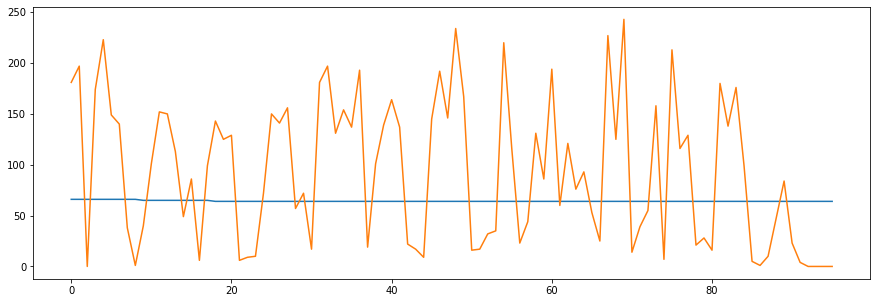

In [9]:
# 2.4.0. plot() - Simple line plot

plt.figure(figsize=(15,5))
fitness.weight.plot()
fitness.caloriesburnt.plot()

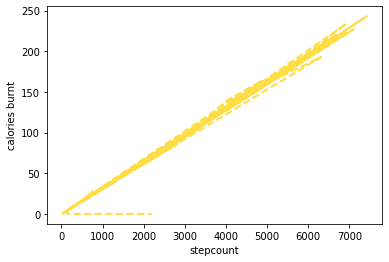

In [10]:
plt.plot(fitness.stepcount, fitness.caloriesburnt, color='#FFDD44', linestyle='dashed', linewidth=2.0)
plt.xlabel('stepcount')  
plt.ylabel('calories burnt')
plt.show()

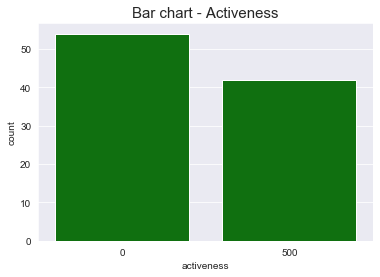

In [11]:
# 2.4.1. countplot() - Plot Categorical data - activeness

sns.set_style('darkgrid')                                         # Set background
plt.title('Bar chart - Activeness',fontsize = 15)                 # Set the title of the chart
sns.countplot(x = "activeness", data = fitness, color = 'green')
plt.show()

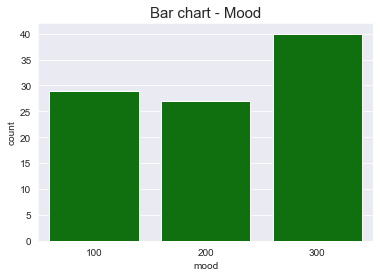

In [12]:
# countplot() contd... - Plot Categorical data - mood

sns.set_style('darkgrid')                                         # Set background
plt.title('Bar chart - Mood',fontsize = 15)                 # Set the title of the chart
sns.countplot(x = "mood", data = fitness, color = 'green')
plt.show()

Skewness is: -0.22192651486731232


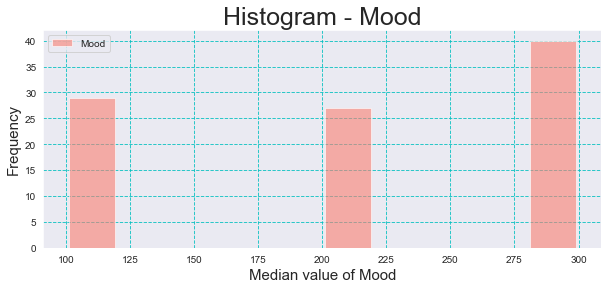

In [13]:
# 2.4.2  hist() - matplotlib package - Histogram (Plot categorical data)

print ("Skewness is:", fitness['mood'].skew())   # skew() - calculate skewness

sns.set_style('darkgrid')                        # Set background - whitegrid/ darkgrid
plt.figure(figsize=(10,4))                       # figure() - Set plot size

plt.hist(fitness['mood'],color='salmon',alpha=0.6, rwidth=0.90,bins=10,label='Mood')   # hist() - Plot the data

plt.grid(axis='both',alpha=0.9,color='c',linestyle='--', linewidth=0.9)  # grid() - Include x,y or both grids, include linestyle and width 
plt.title('Histogram - Mood',loc='center',fontsize=25)                   # Set for the chart
plt.xlabel('Median value of Mood',fontsize=15)                           # Name for x-axis
plt.ylabel('Frequency',fontsize=15)                                      # Name for y-axis
plt.legend()                                                             # Display legend 
plt.show()

**Interpretation **

Distribution has a longer tail on the left. Hence, the distribution is negatively skewed. Skewness is: -0.22192651486731232

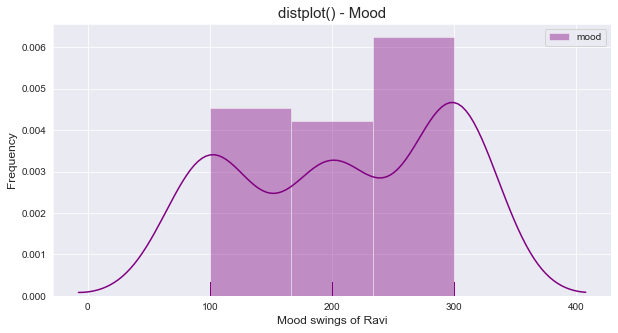

In [14]:
# 2.4.3. distplot() - seaborn library 
#        Flexibly plots a univariate distribution of observations. Shows a default plot with a kernel density estimate & histogram

plt.figure(figsize=(10,5))                          # Change image size
sns.set_style('darkgrid')                           # Set background

sns.distplot(fitness.mood, kde=True, rug=True,label='mood',color='purple') # Method 3

plt.title('distplot() - Mood',fontsize = 15)                               # Title for the chart
plt.xlabel('Mood swings of Ravi',fontsize = 12)                            # Name x-axis
plt.ylabel('Frequency',fontsize = 12)                                      # Name y-axis
plt.legend()                                                               # Displays details of the variable plotted
plt.show()

**Interpretation**

Values of mood are not distributed normally and present multi-modal distribution

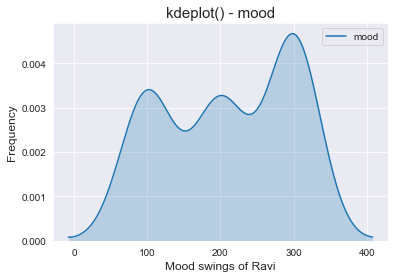

In [15]:
# 2.4.4.  kdeplot()   - seaborn package - (Plot Numerical feature - Plots a histogram & fits a kernel density estimate - KDE)
#         Appropriate when you just want the density estimate 

sns.kdeplot(fitness.mood, shade=True)

plt.title('kdeplot() - mood',fontsize = 15)                          # Title for the chart
plt.xlabel('Mood swings of Ravi',fontsize = 12)                      # Name x-axis
plt.ylabel('Frequency',fontsize = 12)                                # Name y-axis
plt.show()

**Interpretation**

Values of mood are not distributed normally and present multi-modal distribution

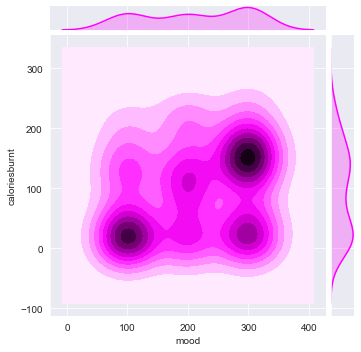

In [16]:
# 2.4.5.  jointplot() - seaborn package - Draw a plot of two variables with bivariate & univariate graphs

sns.jointplot(x = fitness.mood,y =fitness.caloriesburnt,kind="kde",height=5, ratio=10, color='magenta') # Method 3
plt.show()

***Interpretation** - We observe the following:

- Features mood & caloriesburnt are multimodal distributions
- Feature caloriesburnt is negatively skewed displayed on top of the plot 
- Feature mood is also a negatively skewed displayed

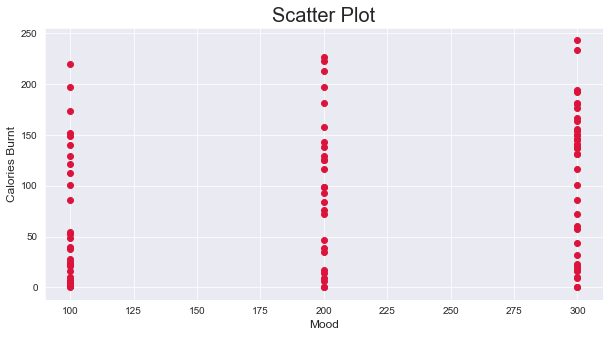

In [17]:
# 2.4.6.  scatter()   - matplotlib package - Scatterplot - Checks the linearity of data. Permissible for both discrete & continuous data
#         A scatter plot of *y* vs *x* with varying marker size and/or color

plt.figure(figsize=(10,5))                                                    # Change image size
sns.set_style('darkgrid')                                                     # Set background

plt.scatter(x = fitness.mood,y =fitness.caloriesburnt,color='crimson')        # Create scatterplot

plt.title('Scatter Plot',fontsize = 20)                                       # Set the title of the chart
plt.xlabel('Mood',fontsize = 12)                                              # Name x-axis
plt.ylabel('Calories Burnt',fontsize = 12)                                    # Name y-axis
plt.show()

**Interpretation**

We observe that more calories are burnt for the third category when the mood value is 300 i.e., when Ravi is happy

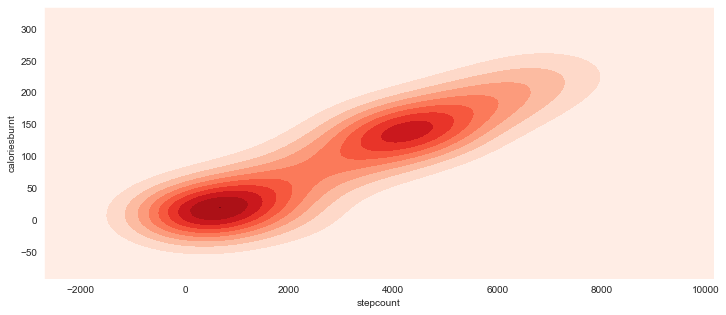

In [18]:
# 2.4.7.  kdeplot()   - seaborn package - Kernel Density Estimate (KDE) plot - Plots probability distribution of continuous sample
#                       Probability distribution of continuous sample

plt.figure(figsize=(12,5))
sns.kdeplot(fitness.stepcount,fitness.caloriesburnt,cmap='Reds',shade=True,shade_lowest=True)
plt.show()

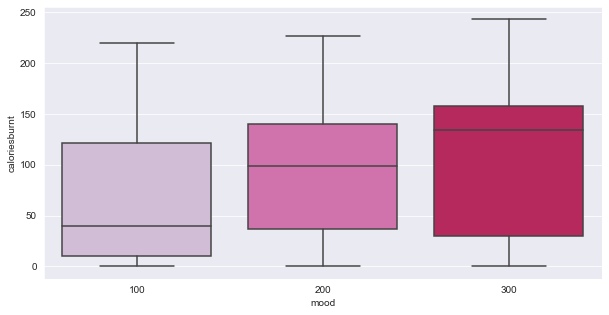

In [19]:
# 2.4.8.  boxplot()   - seaborn package

plt.figure(figsize=(10,5))
sns.boxplot(x = 'mood', y = 'caloriesburnt', data = fitness, palette = 'PuRd')   

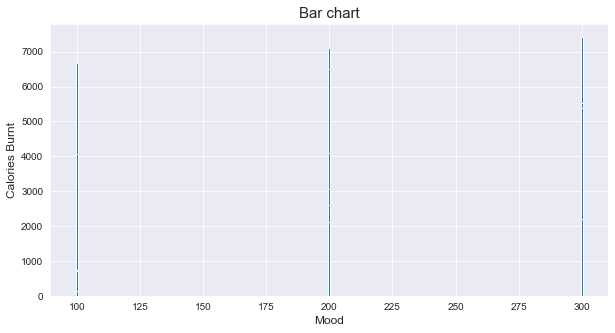

In [20]:
# 2.4.9.  bar()       - matplotlib package - Bars are positioned at x with the given alignment. Their dimensions are given by width &                                             height. The vertical baseline is bottom (default 0)

plt.figure(figsize=(10,5))                                    # Change image size
sns.set_style('darkgrid')                                     # Set background
plt.bar(fitness.mood, fitness.stepcount)                      # bar() - Create bar chart
plt.title('Bar chart',fontsize = 15)                          # Set the title of the chart
plt.xlabel('Mood',fontsize = 12)
plt.ylabel('Calories Burnt',fontsize = 12)
plt.show()

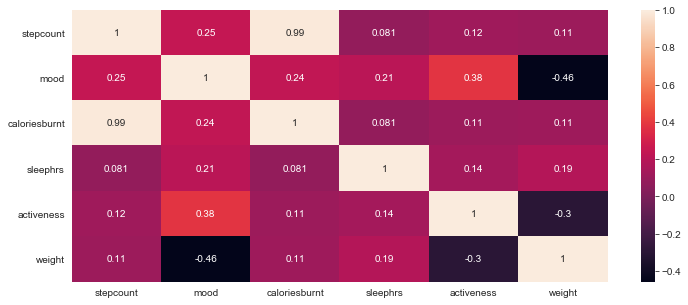

In [21]:
# **III.Pairwise Plots - Visualizing pairwise relationships**
# 2.4.10. heatmap()  - seaborn package - Examines the assocation between features

plt.figure(figsize=(12,5))
sns.heatmap(fitness.corr(), annot=True)

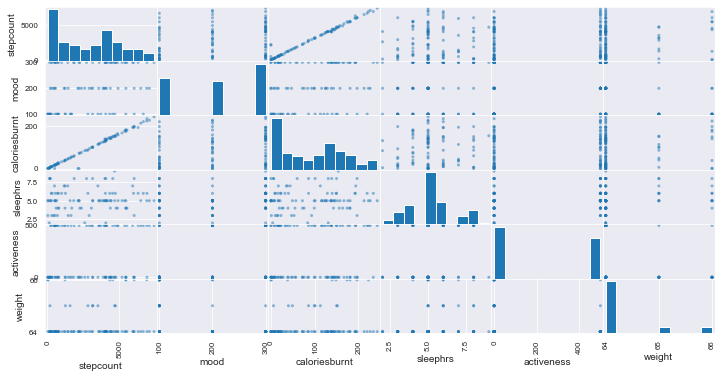

In [22]:
# 2.4.11. scatter_matrix() - Measures Correlation - diagonal - kde  = kernel density estimation, hist = histogram

pd.plotting.scatter_matrix(fitness, figsize=(12, 6), diagonal='hist')
plt.show()

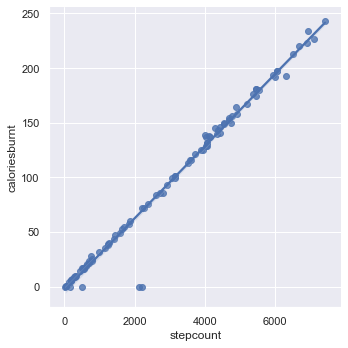

In [23]:
# 2.4.12. lmplot()   - Plot Numeric vs. Numeric features (Bi-variate plot)

sns.set(color_codes=True)
sns.lmplot(x="stepcount", y="caloriesburnt", data=fitness)

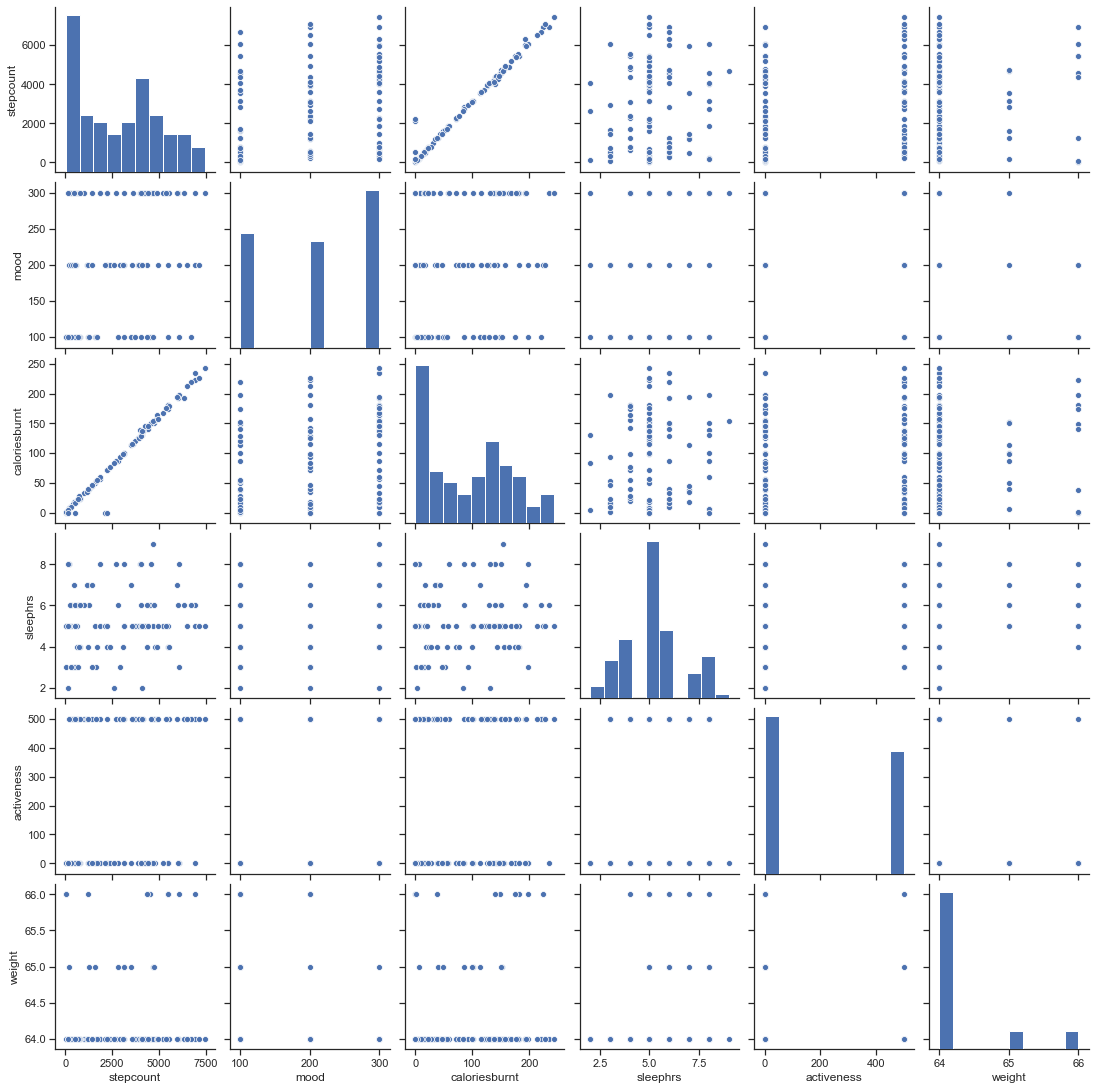

In [24]:
#2.4.13. pairplot()       - Draw scatterplots for joint relationships and histograms for univariate distributions

sns.set(style="ticks", color_codes=True)
sns.pairplot(fitness)

3. Data cleansing/ preprocessing/ manipulation
   3.1. Check for null values
   3.2. Replace values of feature 
        "bool_of_active" - 500 with "Active", 0 with "Inactive"
        "Mood"           - 300 with "Happy", 200 with "Neutral", 100 with "Sad"
   3.3. Highlight the features which are utmost important for our research study
   3.4. Descriptive analysis 
   3.5. Measure the association between the features - build correlation matrix
   3.6. Create dummy variables for the categorical columns; Add dummy columns to the original             dataset. Drop unnecessary features from the dataset 
   3.7. Building a Linear Regression model - "Does exercise increase daily step-count?"
        3.7.1. Split the fitness dataset into train & test datasets
        3.7.2. Build the Linear Regression model and fit the model using train dataset
        3.7.3. Predict the test dataset using the built model 
        3.7.4. Evaluate the model  
   3.8. Building a Logistic Regression model - "Does exercise improve a person’s activeness?"
        3.8.1. Split the fitness dataset into train & test datasets
        3.8.2. Build the Logistic Regression model and fit the model using train dataset
        3.8.3. Predict the test dataset using the built model 
        3.8.4. Evaluate the model       

In [25]:
# load the dataset with data type of date changed from object to datetime64[ns]

fitness = pd.read_csv(r'C:\Users\hp\Downloads\body_fitness_dataset.csv',parse_dates=['date']) 
print("Dimensions of dataset: ",fitness.shape)
print("Column names \n",fitness.columns)
fitness.info()
fitness.head()

Dimensions of dataset:  (96, 7)
Column names 
 Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             96 non-null     datetime64[ns]
 1   step_count       96 non-null     int64         
 2   mood             96 non-null     int64         
 3   calories_burned  96 non-null     int64         
 4   hours_of_sleep   96 non-null     int64         
 5   bool_of_active   96 non-null     int64         
 6   weight_kg        96 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.4 KB


,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [26]:
# Change features names (step_count to stepcount, calories_burned to caloriesburnt, hours_of_sleep to sleephrs, 
#                        bool_of_active to activeness, and weight_kg to weight)

fitness.rename({'step_count':'stepcount','calories_burned':'caloriesburnt','hours_of_sleep':'sleephrs',
                'bool_of_active':'activeness','weight_kg':'weight'},axis=1,inplace=True)
print("Modified column names for confirmed dataset  \n", fitness.columns)

Modified column names for confirmed dataset  
 Index(['date', 'stepcount', 'mood', 'caloriesburnt', 'sleephrs', 'activeness',
       'weight'],
      dtype='object')


In [27]:
# 3.1. Check for null values 

print("Activeness Status \n",fitness.isnull().sum())

Activeness Status 
 date             0
stepcount        0
mood             0
caloriesburnt    0
sleephrs         0
activeness       0
weight           0
dtype: int64


In [28]:
# 3.2. Replace values of feature 
#      "bool_of_active" - 500 with "Active", 0 with "Inactive"
#      "Mood"           - 300 with "Happy", 200 with "Neutral", 100 with "Sad"

fitness['activeness'] = fitness['activeness'].replace(500,'Active')
fitness['activeness'] = fitness['activeness'].replace(0,'In-active')

fitness['mood'] = fitness['mood'].replace(300,'Happy')
fitness['mood'] = fitness['mood'].replace(200,'Neutral')
fitness['mood'] = fitness['mood'].replace(100,'Sad')

fitness.head()

,date,stepcount,mood,caloriesburnt,sleephrs,activeness,weight
0,2017-10-06,5464,Neutral,181,5,In-active,66
1,2017-10-07,6041,Sad,197,8,In-active,66
2,2017-10-08,25,Sad,0,5,In-active,66
3,2017-10-09,5461,Sad,174,4,In-active,66
4,2017-10-10,6915,Neutral,223,5,Active,66


In [29]:
# 3.3. Highlight the features which are utmost important for our research study

def highlight_cases(x):
    r = 'background-color: red'
    g = 'background-color: green'
    temp = pd.DataFrame('',index = x.index,columns=x.columns)
    temp.iloc[:,5]   = r
    temp.iloc[:,0:5] = g
    temp.iloc[:,6]   = g
    return temp
fitness.style.apply(highlight_cases,axis=None)

,date,stepcount,mood,caloriesburnt,sleephrs,activeness,weight
0,2017-10-06 00:00:00,5464,Neutral,181,5,In-active,66
1,2017-10-07 00:00:00,6041,Sad,197,8,In-active,66
2,2017-10-08 00:00:00,25,Sad,0,5,In-active,66
3,2017-10-09 00:00:00,5461,Sad,174,4,In-active,66
4,2017-10-10 00:00:00,6915,Neutral,223,5,Active,66
5,2017-10-11 00:00:00,4545,Sad,149,6,In-active,66
6,2017-10-12 00:00:00,4340,Sad,140,6,In-active,66
7,2017-10-13 00:00:00,1230,Sad,38,7,In-active,66
8,2017-10-14 00:00:00,61,Sad,1,5,In-active,66
9,2017-10-15 00:00:00,1258,Sad,40,6,In-active,65


In [30]:
# 3.4. Descriptive analysis 

fitness.describe()

,stepcount,caloriesburnt,sleephrs,weight
count,96.000000,96.000000,96.00000,96.000000
mean,2935.937500,93.447917,5.21875,64.281250
std,2143.384573,71.601951,1.51625,0.627495
min,25.000000,0.000000,2.00000,64.000000
25%,741.000000,21.750000,4.00000,64.000000
50%,2987.500000,96.000000,5.00000,64.000000
75%,4546.250000,149.250000,6.00000,64.000000
max,7422.000000,243.000000,9.00000,66.000000


In [31]:
# contd... Perform Exploratory data analysis (EDA) - Categorical features

fitness.describe(include=['object'])

,mood,activeness
count,96,96
unique,3,2
top,Happy,In-active
freq,40,54


Interpretation 

- Majority of the times (40), Ravi is happy 
- Majority of the times (54), Ravi is in-active 

In [32]:
# 3.5. Measure the association between the features - build correlation matrix

fitness.corr()          # Karl Pearson's Coefficient of Correlation Method

,stepcount,caloriesburnt,sleephrs,weight
stepcount,1.000000,0.989260,0.080687,0.109404
caloriesburnt,0.989260,1.000000,0.080726,0.112200
sleephrs,0.080687,0.080726,1.000000,0.189118
weight,0.109404,0.112200,0.189118,1.000000


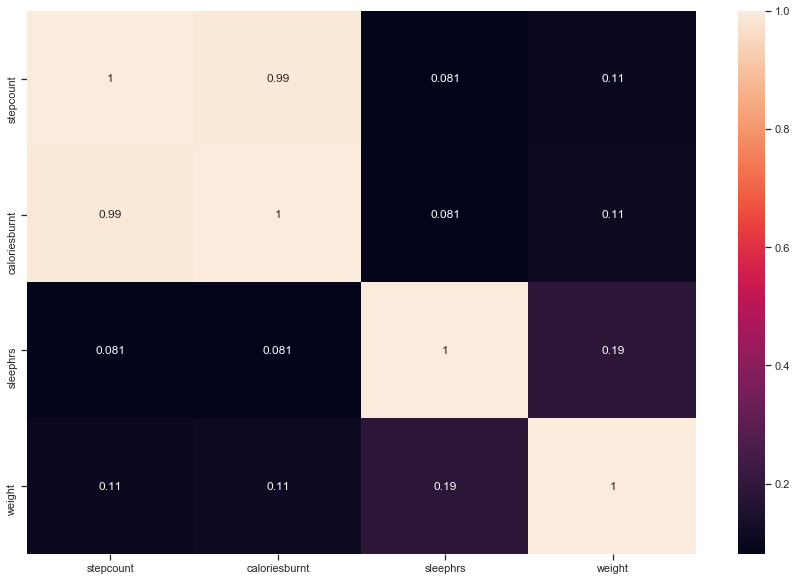

In [33]:
# Contd... Graphical measurement of association

plt.figure(figsize=(15,10))
sns.heatmap(fitness.corr(), annot=True)

In [34]:
# 3.6. Create dummy variables for the categorical columns; Add dummy columns to the original dataset 
#      Drop unnecessary features from the dataset

fitness=pd.get_dummies(fitness, columns=["mood","activeness"])
fitness.drop(['date'], axis=1, inplace=True)
print("Dimensions of the dataset :", fitness.shape)
fitness.head(6)

Dimensions of the dataset : (96, 9)


,stepcount,caloriesburnt,sleephrs,weight,mood_Happy,mood_Neutral,mood_Sad,activeness_Active,activeness_In-active
0,5464,181,5,66,0,1,0,0,1
1,6041,197,8,66,0,0,1,0,1
2,25,0,5,66,0,0,1,0,1
3,5461,174,4,66,0,0,1,0,1
4,6915,223,5,66,0,1,0,1,0
5,4545,149,6,66,0,0,1,0,1


**Research question - 1**
Does exercise/ working-out increase daily step-count? 

**Hypothesis**
H0: There is no association between exercise and increase in daily step-count
H1: There is a significant association between exercise and increase in daily step-count

Dependent Feature/ Variable/ Attribute 
   - stepcount

Independent Features/ Variables/ Atributes
   - caloriesburnt
   - sleephrs 
   - weight
   - mood_Happy, mood_Neutral, mood_Sad
   - activeness_Active, activeness_In-active

3.7. Building a Linear Regression model
     3.7.1. Split the fitness dataset into train & test datasets
     3.7.2. Build the Linear Regression model and fit the model using train dataset
     3.7.3. Predict the test dataset using the built model 
     3.7.4. Evaluate the model      

In [35]:
# 3.7.1. Split the fitness dataset into train & test datasets

X = fitness.drop(['stepcount'], axis=1)
Y = fitness[['stepcount']]
print("Features of X - ",X.columns)
print("Features of Y - ",Y.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state = 101)
print("Dimensions of fitness dataset including Address feature  :", fitness.shape)
print("Input attributes X - Train dataset :", X_train.shape)
print("Input attributes X - Test dataset  :", X_test.shape)
print("Output attribute Y - Train dataset :", Y_train.shape)
print("Output attribute Y - Test dataset  :", Y_test.shape)

Features of X -  Index(['caloriesburnt', 'sleephrs', 'weight', 'mood_Happy', 'mood_Neutral',
       'mood_Sad', 'activeness_Active', 'activeness_In-active'],
      dtype='object')
Features of Y -  Index(['stepcount'], dtype='object')
Dimensions of fitness dataset including Address feature  : (96, 9)
Input attributes X - Train dataset : (76, 8)
Input attributes X - Test dataset  : (20, 8)
Output attribute Y - Train dataset : (76, 1)
Output attribute Y - Test dataset  : (20, 1)


In [36]:
# 3.7.2. Build the Linear Regression model and fit the model using train dataset

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Model the equation - Evaluate the model by checking out it's coefficients and interpret them
#                      Print the intercept & the coefficients of input features """

print("Intercept is :",lm.intercept_)                                # intercept_ gives Y-intercept value
print("Coefficients of the input features \n",lm.coef_)              
print(X.columns)

Intercept is : [-2761.42260035]
Coefficients of the input features 
 [[ 29.36748323  -2.39621345  46.13251252  24.27763435  66.28802792
  -90.56566227  10.56934685 -10.56934685]]
Index(['caloriesburnt', 'sleephrs', 'weight', 'mood_Happy', 'mood_Neutral',
       'mood_Sad', 'activeness_Active', 'activeness_In-active'],
      dtype='object')


**Interpretation**

"""  Scientific Notation - 1.2e-6 = 0.0000012      5.48E+03 = 5482.52291

y = -2761.42260035 + (29.36748323 * caloriesburnt) + (-2.39621345 * sleephrs) 
                   + (46.13251252 * weight) + (24.27763435 * mood_Happy) 
                   + (66.28802792 * mood_Neutral) + (-90.56566227 * mood_Sad) 
                   + (10.56934685 * activeness_Active) + (-10.56934685 * activeness_In-active)
               
- Holding all other features fixed, a 1 unit increase in caloriesburnt is associated with an         increase in stepcount by 29
- Holding all other features fixed, a 1 unit increase in sleephrs is associated with an             decrease in stepcount by 2
- Holding all other features fixed, a 1 unit increase in weight is associated with an increase       in stepcount by 46
- Holding all other features fixed, a 1 unit increase in mood_Happy is associated with an increase   in stepcount by 24
- Holding all other features fixed, a 1 unit increase in mood_Neutral is associated with an         increase in stepcount by 66
- Holding all other features fixed, a 1 unit increase in mood_Sad is associated with a decrease     in stepcount by 91
- Holding all other features fixed, a 1 unit increase in activeness_Active is associated with an     increase in stepcount by 11
- Holding all other features fixed, a 1 unit increase in activeness_In-active is associated with a   decrease in stepcount by 11

In [38]:
# 3.7.3. Predict the test dataset using the built model 

predict_test = lm.predict(X_test)                                   # Predict for test dataset
predict_test
#df = pd.DataFrame({'Actual':Y_test,'Predicted':predict_test})   # Display Actual against Predicted values
#df

array([[1279.00399465],
       [4279.25858821],
       [4053.87577754],
       [ 293.09089621],
       [ 758.18666582],
       [ 755.18172345],
       [1660.34985638],
       [7062.38028324],
       [4237.26931727],
       [ 224.77954081],
       [1501.30095014],
       [ 403.81207387],
       [4480.43797261],
       [5282.54544488],
       [4895.99685863],
       [5948.41270532],
       [ 694.65927246],
       [4451.07048938],
       [ 774.30250979],
       [6557.53091513]])

In [39]:
# 3.7.4. Evaluate the model

from sklearn import metrics
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

# Check R2 value for the model 
print("Accuracy of the model - R2                      = ",lm.score(X_test,Y_test))       # Method 2

# Evaluate the performance of algorithm/ model developed
print('Maximum error between original & predicted data = ', max_error(Y_test, predict_test))
print('Mean Absolute Error (MAE)                       = ', metrics.mean_absolute_error(Y_test, predict_test))
print('Mean squared error (MSE)                        = ', metrics.mean_squared_error(Y_test, predict_test))
print('Root mean squared error (RMSE)                  = ', np.sqrt(metrics.mean_squared_error(Y_test, predict_test)))

Accuracy of the model - R2                      =  0.9976096684404832
Maximum error between original & predicted data =  201.8120738741195
Mean Absolute Error (MAE)                       =  98.51026281863328
Mean squared error (MSE)                        =  13093.476659567194
Root mean squared error (RMSE)                  =  114.42673052904725


**Interpretation*

- From the model developed, R2 value demostrates that in 99.7 percent of the cases stepcount is     explained by the input exercise attributes (caloriesburnt, sleephrs , weight, mood_Happy,         mood_Neutral, mood_Sad, activeness_Active, activeness_In-active)  
- It is observed that the value of root mean squared error is 114.4, which is lying within the       limit of min and max for stepcount while running describe() function in Python Programming         language. 
- This means algorithm is accurate but can make good predictions 

**Research question - 2**
Does exercise/ working-out improve a person’s activeness? 

**Hypothesis**
H0: There is no association between exercise and improvement in person’s activeness
H1: There is a significant association between exercise and improvement in person’s activeness

Dependent Feature/ Variable/ Attribute 
   - activeness

Independent Features/ Variables/ Atributes
 
   - caloriesburnt
   - sleephrs 
   - mood
  ' Here we are taking only 3 independent variables because caloriesburnt and stepcount are highly correlated'

3.8. Building a naive bayes model
     3.8.1. Split the  dataset into train & test datasets
     3.8.2. Build the naive bayes model and fit the model using train dataset
     3.8.3. Predict the test dataset using the built model 
     3.8.4. Evaluate the model       

In [2]:
# 3.8.1 load the dataset with data type of date changed from object to datetime64[ns]

data = pd.read_csv("C:/Users/Reshma/Downloads/BODY_FITNESS_DATASET.csv",parse_dates=['date']) 
print("Dimensions of dataset: ",data.shape)
print("Column names \n",data.columns)
data.info()
data.head()

Dimensions of dataset:  (96, 7)
Column names 
 Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             96 non-null     datetime64[ns]
 1   step_count       96 non-null     int64         
 2   mood             96 non-null     int64         
 3   calories_burned  96 non-null     int64         
 4   hours_of_sleep   96 non-null     int64         
 5   bool_of_active   96 non-null     int64         
 6   weight_kg        96 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.4 KB


,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [3]:
# Change features names (step_count to stepcount, calories_burned to caloriesburnt, hours_of_sleep to sleephrs, 
#                        bool of active to activeness, and weight_kg to weight)

data.rename({'step_count':'stepcount','calories_burned':'caloriesburnt','hours_of_sleep':'sleephrs',
                'bool_of_active':'activeness','weight_kg':'weight'},axis=1,inplace=True)
print("Modified column names for confirmed dataset  \n", data.columns)

Modified column names for confirmed dataset  
 Index(['date', 'stepcount', 'mood', 'caloriesburnt', 'sleephrs', 'activeness',
       'weight'],
      dtype='object')


In [4]:
#  Replace values of feature 
#      "bool_of_active" - 500 with "Active", 0 with "Inactive"
#      "Mood"           - 300 with "Happy", 200 with "Neutral", 100 with "Sad"

data['activeness'] = data['activeness'].replace(500,'Active')
data['activeness'] = data['activeness'].replace(0,'In-active')

data['mood'] = data['mood'].replace(300,'Happy')
data['mood'] = data['mood'].replace(200,'Neutral')
data['mood'] = data['mood'].replace(100,'Sad')

data.head()

,date,stepcount,mood,caloriesburnt,sleephrs,activeness,weight
0,2017-10-06,5464,Neutral,181,5,In-active,66
1,2017-10-07,6041,Sad,197,8,In-active,66
2,2017-10-08,25,Sad,0,5,In-active,66
3,2017-10-09,5461,Sad,174,4,In-active,66
4,2017-10-10,6915,Neutral,223,5,Active,66


In [5]:
#label encoding
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
lb = LabelEncoder()
data['activeness'] = lb.fit_transform(data['activeness'])
data

,date,stepcount,mood,caloriesburnt,sleephrs,activeness,weight
0,2017-10-06,5464,Neutral,181,5,1,66
1,2017-10-07,6041,Sad,197,8,1,66
2,2017-10-08,25,Sad,0,5,1,66
3,2017-10-09,5461,Sad,174,4,1,66
4,2017-10-10,6915,Neutral,223,5,0,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,Sad,4,2,1,64
92,2018-01-06,153,Happy,0,8,1,64
93,2018-01-07,500,Neutral,0,5,0,64
94,2018-01-08,2127,Neutral,0,5,1,64


In [6]:
data.drop('date', axis=1, inplace=True)
data

,stepcount,mood,caloriesburnt,sleephrs,activeness,weight
0,5464,Neutral,181,5,1,66
1,6041,Sad,197,8,1,66
2,25,Sad,0,5,1,66
3,5461,Sad,174,4,1,66
4,6915,Neutral,223,5,0,66
...,...,...,...,...,...,...
91,133,Sad,4,2,1,64
92,153,Happy,0,8,1,64
93,500,Neutral,0,5,0,64
94,2127,Neutral,0,5,1,64


In [7]:
data.drop('stepcount', axis=1, inplace=True)
data

,mood,caloriesburnt,sleephrs,activeness,weight
0,Neutral,181,5,1,66
1,Sad,197,8,1,66
2,Sad,0,5,1,66
3,Sad,174,4,1,66
4,Neutral,223,5,0,66
...,...,...,...,...,...
91,Sad,4,2,1,64
92,Happy,0,8,1,64
93,Neutral,0,5,0,64
94,Neutral,0,5,1,64


In [8]:
data.drop('weight', axis=1, inplace=True)
data

,mood,caloriesburnt,sleephrs,activeness
0,Neutral,181,5,1
1,Sad,197,8,1
2,Sad,0,5,1
3,Sad,174,4,1
4,Neutral,223,5,0
...,...,...,...,...
91,Sad,4,2,1
92,Happy,0,8,1
93,Neutral,0,5,0
94,Neutral,0,5,1


In [9]:
y = data.iloc[:,3]
y

0     1
1     1
2     1
3     1
4     0
     ..
91    1
92    1
93    0
94    1
95    0
Name: activeness, Length: 96, dtype: int32

In [10]:
independent_variables = data.iloc[:,0:3]
independent_variables

,mood,caloriesburnt,sleephrs
0,Neutral,181,5
1,Sad,197,8
2,Sad,0,5
3,Sad,174,4
4,Neutral,223,5
...,...,...,...
91,Sad,4,2
92,Happy,0,8
93,Neutral,0,5
94,Neutral,0,5


In [11]:
# one hot encoding
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("mood", OneHotEncoder(),[0])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
x=ct.fit_transform(independent_variables)
x                   

array([[  0.,   1.,   0., 181.,   5.],
       [  0.,   0.,   1., 197.,   8.],
       [  0.,   0.,   1.,   0.,   5.],
       [  0.,   0.,   1., 174.,   4.],
       [  0.,   1.,   0., 223.,   5.],
       [  0.,   0.,   1., 149.,   6.],
       [  0.,   0.,   1., 140.,   6.],
       [  0.,   0.,   1.,  38.,   7.],
       [  0.,   0.,   1.,   1.,   5.],
       [  0.,   0.,   1.,  40.,   6.],
       [  0.,   0.,   1., 101.,   8.],
       [  0.,   0.,   1., 152.,   5.],
       [  1.,   0.,   0., 150.,   6.],
       [  0.,   0.,   1., 113.,   7.],
       [  0.,   0.,   1.,  49.,   5.],
       [  0.,   0.,   1.,  86.,   6.],
       [  0.,   0.,   1.,   6.,   8.],
       [  0.,   1.,   0.,  99.,   5.],
       [  0.,   1.,   0., 143.,   4.],
       [  0.,   1.,   0., 125.,   5.],
       [  0.,   1.,   0., 129.,   6.],
       [  0.,   1.,   0.,   6.,   8.],
       [  0.,   1.,   0.,   9.,   5.],
       [  1.,   0.,   0.,  10.,   6.],
       [  0.,   1.,   0.,  72.,   5.],
       [  1.,   0.,   0.,

In [17]:
# feature scaling
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
x =minmax.fit(x).transform(x)
x

array([[0.        , 1.        , 0.        , 0.74485597, 0.42857143],
       [0.        , 0.        , 1.        , 0.81069959, 0.85714286],
       [0.        , 0.        , 1.        , 0.        , 0.42857143],
       [0.        , 0.        , 1.        , 0.71604938, 0.28571429],
       [0.        , 1.        , 0.        , 0.91769547, 0.42857143],
       [0.        , 0.        , 1.        , 0.61316872, 0.57142857],
       [0.        , 0.        , 1.        , 0.57613169, 0.57142857],
       [0.        , 0.        , 1.        , 0.1563786 , 0.71428571],
       [0.        , 0.        , 1.        , 0.00411523, 0.42857143],
       [0.        , 0.        , 1.        , 0.16460905, 0.57142857],
       [0.        , 0.        , 1.        , 0.41563786, 0.85714286],
       [0.        , 0.        , 1.        , 0.6255144 , 0.42857143],
       [1.        , 0.        , 0.        , 0.61728395, 0.57142857],
       [0.        , 0.        , 1.        , 0.46502058, 0.71428571],
       [0.        , 0.        , 1.

In [18]:
#Split the  dataset into train & test datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


# Naive bayes

In [19]:
 # 3.8.2. Build the naive bayes model and fit the model using train dataset
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# 3.8.3. Predict the test dataset using the built model 
nb_predict =nb.predict(X_test)
nb_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [21]:
#3.8.4. Evaluate the model
# accuracy test
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,nb_predict))

0.717948717948718


In [83]:
# Evaluate the model       

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, nb_predict)

array([[13,  2],
       [ 9, 15]], dtype=int64)

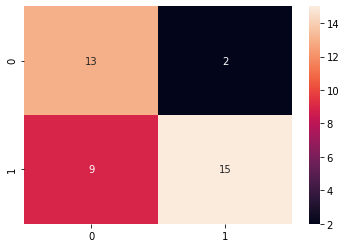

In [37]:
# contd...

sns.heatmap(confusion_matrix(y_test, nb_predict), annot=True)

**Interpretation**

- True positives   : 13 (upper left) 
- True negatives   : 15 (lower right) 
- False positives  : 2 (upper right) 
- False negatives  : 9 (lower left)

## The End